In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter
from scipy import signal
import skimage
from skimage import io, color, img_as_float, img_as_int, img_as_ubyte, exposure

In [2]:
def convertToRGB(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [3]:
def convertToGray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# A.	Neighborhood Processing (Smoothing)

#### 1.	Pilih gambar 1 channel/grayscale 200x100 piksel (landscape) dan tampilkan histogramnya

In [4]:
im = io.imread('kat.jpg')
im.shape

(383, 680, 3)

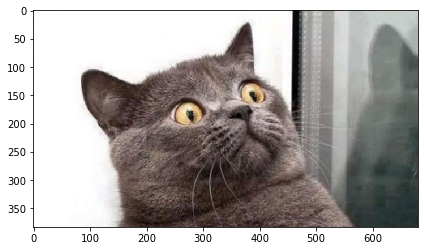

In [5]:
io.imshow(im)

In [6]:
imre = cv.resize(im, (200, 100))

In [7]:
imre.shape

(100, 200, 3)

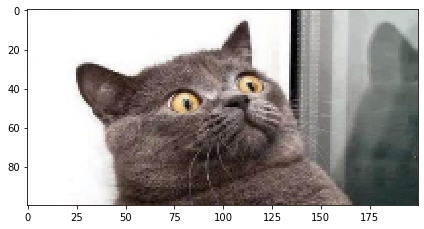

In [8]:
io.imshow(imre)

In [9]:
from skimage.io import *

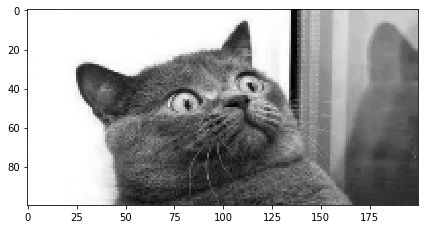

In [10]:
imggrey=color.rgb2gray(imre)
gray1 = img_as_ubyte(imggrey)
imshow(gray1)

In [11]:
gray1.shape

(100, 200)

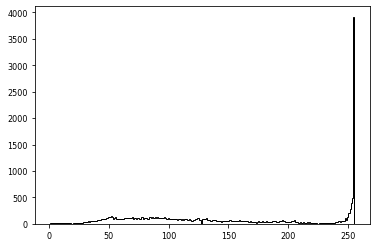

In [12]:
matplotlib.rcParams['font.size'] = 8

plt.hist(gray1.ravel(), bins=256, histtype='step', color='black')
plt.show()

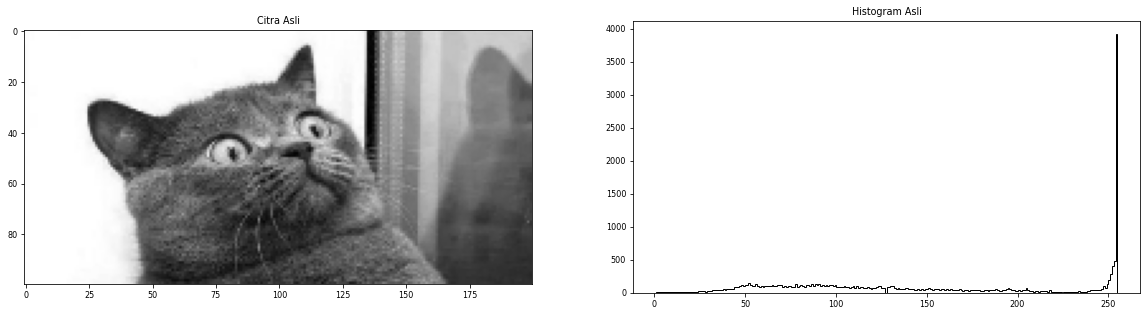

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.set_title('Citra Asli')
ax1.imshow(convertToRGB(gray1))
ax2.set_title('Histogram Asli')
ax2.hist(img_as_ubyte(gray1).ravel(), bins=256, histtype='step', color='black')

plt.show()

In [14]:
citra = pd.DataFrame(gray1)
citra

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,253,253,254,253,255,255,255,255,255,255,...,204,204,204,205,205,205,203,201,200,203
1,253,252,254,253,255,255,255,255,255,255,...,202,202,202,204,204,206,206,205,203,203
2,253,252,255,253,255,255,255,255,255,255,...,203,204,204,205,203,202,205,204,201,200
3,253,253,255,253,255,255,255,255,255,255,...,205,204,204,205,203,202,205,204,199,195
4,253,253,255,255,255,255,255,255,255,255,...,205,204,203,202,203,202,202,201,200,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,254,254,255,255,255,255,255,255,255,255,...,48,46,46,44,45,44,45,46,45,41
96,253,254,255,255,255,255,255,255,255,255,...,47,44,45,45,47,47,45,44,42,38
97,253,254,255,255,255,255,255,255,255,255,...,49,47,48,47,49,48,46,46,44,41
98,254,253,255,255,255,255,255,255,255,255,...,50,46,45,50,51,53,45,48,47,44


In [15]:
citra.to_excel("citraasli.xlsx")

#### 2.	Lakukan proses penghalusan (smoothing) pada gambar tersebut menggunakan program average filter dan gaussian filter

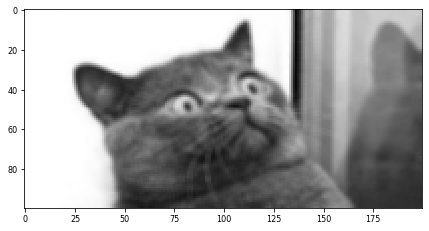

In [16]:
average = cv.blur(gray1,(3,3))
imshow(average)

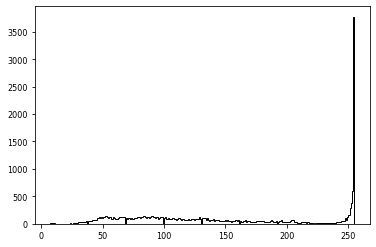

In [17]:
matplotlib.rcParams['font.size'] = 8

plt.hist(average.ravel(), bins=256, histtype='step', color='black')
plt.show()

In [18]:
averagedata = pd.DataFrame(average)
averagedata

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,253,253,253,254,254,255,255,255,255,255,...,202,203,203,204,205,205,205,204,203,202
1,253,253,253,254,254,255,255,255,255,255,...,203,203,204,204,204,204,204,203,202,202
2,253,253,253,254,254,255,255,255,255,255,...,203,203,204,204,204,204,204,204,202,200
3,253,254,254,255,255,255,255,255,255,255,...,204,204,204,204,203,203,203,202,200,199
4,253,254,254,255,255,255,255,255,255,255,...,205,204,204,203,202,201,200,200,197,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,254,254,255,255,255,255,255,255,255,255,...,47,46,45,46,46,46,45,45,44,44
96,254,254,255,255,255,255,255,255,255,255,...,47,47,46,46,46,46,46,45,43,42
97,254,254,255,255,255,255,255,255,255,255,...,48,47,46,47,49,48,47,45,44,43
98,254,254,255,255,255,255,255,255,255,255,...,49,47,47,48,49,48,47,46,45,45


In [19]:
averagedata.to_excel("average.xlsx")

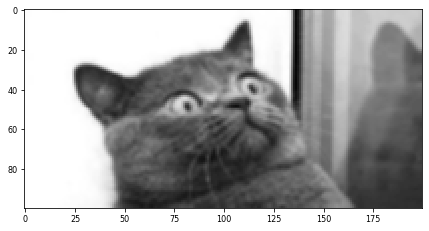

In [20]:
gaussian = cv.GaussianBlur(gray1,(3,3),0)
imshow(gaussian)

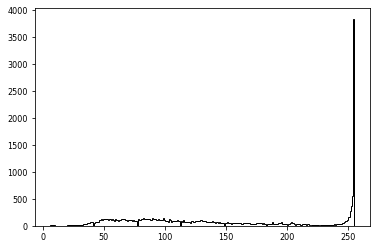

In [21]:
matplotlib.rcParams['font.size'] = 8

plt.hist(gaussian.ravel(), bins=256, histtype='step', color='black')
plt.show()

In [22]:
kernel_gausian = cv.getGaussianKernel(ksize=3,sigma=0)
kernel_gausian.round(2)

array([[0.25],
       [0.5 ],
       [0.25]])

In [23]:
gaussiandata = pd.DataFrame(gaussian)
gaussiandata

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,253,253,253,254,255,255,255,255,255,255,...,203,203,203,204,205,205,204,203,202,202
1,253,253,253,254,255,255,255,255,255,255,...,203,203,203,204,204,205,205,204,202,202
2,253,253,254,254,255,255,255,255,255,255,...,203,203,204,204,204,204,204,204,201,200
3,253,253,254,254,255,255,255,255,255,255,...,205,204,204,204,203,203,203,203,200,198
4,253,254,254,255,255,255,255,255,255,255,...,205,204,204,203,202,202,201,200,198,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,254,254,255,255,255,255,255,255,255,255,...,47,46,45,45,46,45,45,45,44,43
96,254,254,255,255,255,255,255,255,255,255,...,47,46,46,46,46,46,46,45,43,41
97,254,254,255,255,255,255,255,255,255,255,...,48,47,47,48,49,48,47,45,44,43
98,254,254,255,255,255,255,255,255,255,255,...,49,47,47,48,49,49,47,46,46,45


In [24]:
gaussiandata.to_excel("gaussian.xlsx")

(100, 200) (1, 3)
4.75
255.0


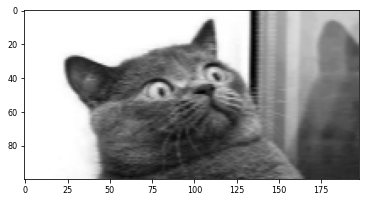

In [25]:
w_c = np.array([[0.25, 0.5, 0.25], ],
dtype='float')
 
w_c = np.rot90(w_c, 2)
 
print (gray1.shape, w_c.shape)
c = signal.convolve2d(gray1, w_c, 'valid')
print(np.min(c))
print(np.max(c))

plt.imshow(c,'gray')

In [26]:
c

array([[253.25, 253.5 , 253.75, ..., 203.  , 201.25, 201.  ],
       [252.75, 253.25, 253.75, ..., 205.75, 204.75, 203.5 ],
       [253.  , 253.75, 254.  , ..., 204.  , 203.5 , 201.5 ],
       ...,
       [254.  , 254.75, 255.  , ...,  46.5 ,  45.5 ,  43.75],
       [253.75, 254.5 , 255.  , ...,  47.75,  47.  ,  46.5 ],
       [254.25, 254.75, 255.  , ...,  45.5 ,  46.25,  46.25]])

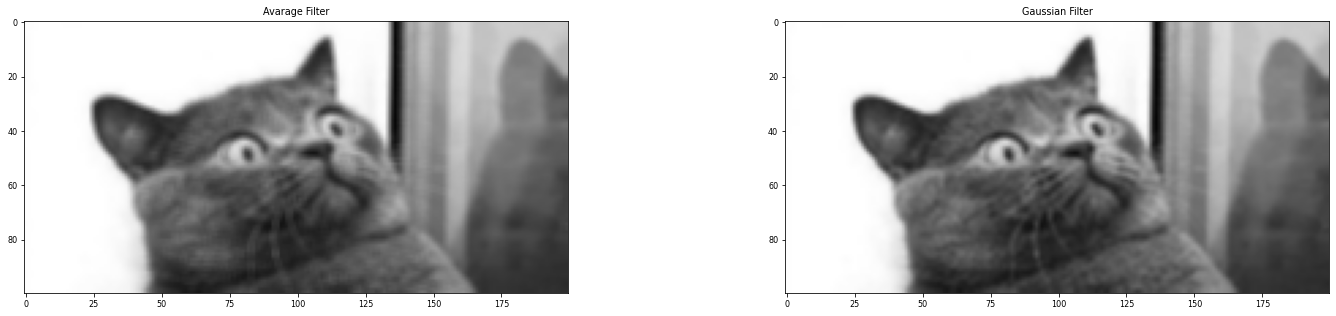

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))

ax1.set_title('Avarage Filter')
ax1.imshow(convertToRGB(average))
ax2.set_title('Gaussian Filter')
ax2.imshow(convertToRGB(gaussian))

plt.show()

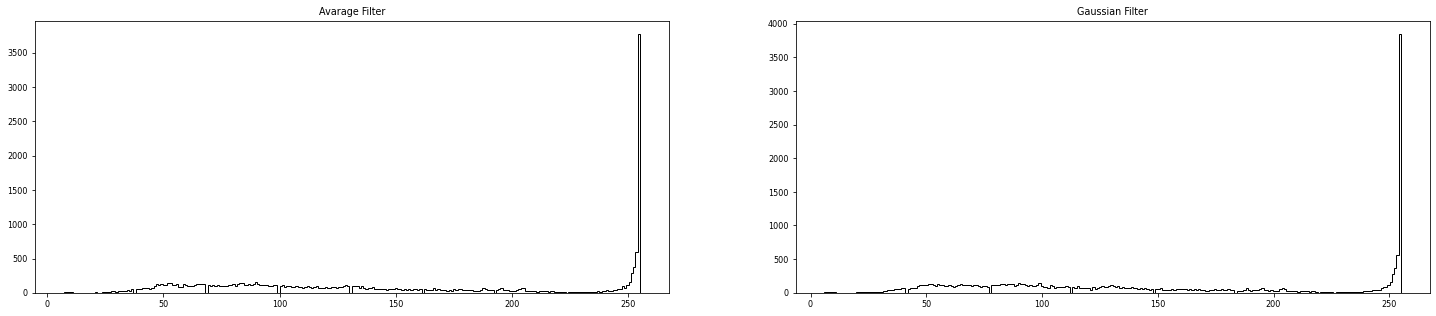

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))

ax1.set_title('Avarage Filter')
ax1.hist(average.ravel(), bins=256, histtype='step', color='black')
ax2.set_title('Gaussian Filter')
ax2.hist(gaussian.ravel(), bins=256, histtype='step', color='black')

plt.show()

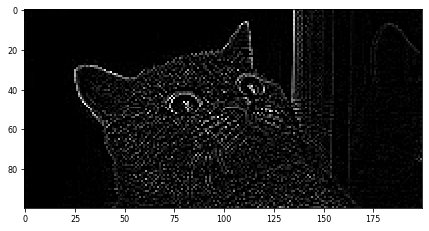

In [29]:
laplacian = cv.Laplacian(gray1,-1,1,1)
imshow(laplacian)

In [30]:
laplacian

array([[ 0,  0,  0, ...,  9, 10,  0],
       [ 0,  4,  0, ...,  0,  0,  0],
       [ 0,  5,  0, ...,  0,  2,  0],
       ...,
       [ 3,  0,  0, ...,  0,  0,  6],
       [ 0,  5,  0, ...,  0,  0,  5],
       [ 0,  0,  0, ...,  0,  3,  0]], dtype=uint8)

#### 3.	Tuliskan kernel yang digunakan untuk masing-masing proses konvolusi! Berapa ukuran kernel yang digunakan pada masing-masing filter tersebut? dan bagian mana di program yang menunjukkan hal tersebut?

masing masing menggunakan kernel 3x3 dan dapat dilihat di kondingan berikut :
- average: 
~~~
  average = cv2.blur(gray1,(3,3))
~~~
- grausian:
~~~
  gaussian = cv2.GaussianBlur(gray1,(3,3),50)
~~~

#### 4.	Pada program yang digunakan, apa yang dilakukan pada tepian gambar saat melakukan konvolusi? (zero padding / border replication / ignore the edge / lainnya) dan bagian mana di program yang menunjukkan hal tersebut?

- Average = Border Replication
- Grausian = Border Replication

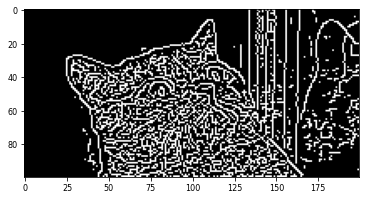

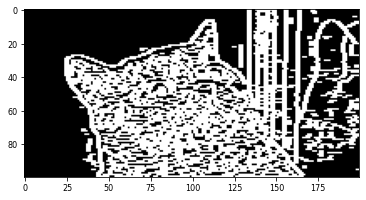

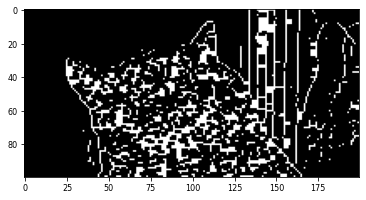

In [31]:
canny = cv.Canny(gray1,40,40)

kernel = np.ones((1,3),np.uint8)
dilasi = cv.dilate(canny, kernel, iterations = 1)

kernel_erosi = np.ones((2,3),np.uint8)
erosi = cv.erode(dilasi, kernel_erosi, iterations = 1)

plt.imshow(canny, cmap='gray')
plt.show()
plt.imshow(dilasi,'gray')
plt.show()
plt.imshow(erosi,'gray')
plt.show()

#### 5.	Pada program yang digunakan, apa yang dilakukan pada nilai hasil konvolusi yang berada di luar range intensitas gambar? (clipping / absolute / scalling / lainnya) dan bagian mana di program yang menunjukkan hal tersebut?

Scaling kedua duanya

#### 6.	Copy nilai matriks 3x3 pojok kiri atas: gambar asli, gambar hasil average filter, gambar hasil gaussian filter

<TABLE  BORDER="1">
   <font size="5">
   <TR>
      <TH>
          <font size="5">
          Gambar Asli
          </font>
       </TH>
      <TH>
          <font size="5">
          Average Filter
          </font>
       </TH>
      <TH>
          <font size="5">
          Gaussian Filter
          </font>
       </TH>
   </TR>
   <TR>
      <TD>
          <font size="5">
          253 253 254<br>
          <br>
          253 252 254<br>
          <br>
          253 252 255<br>
          </font>
       </TD>
      <TD>
          <font size="5">
          253 253 253<br>
          <br>
          253 253 253<br>
          <br>
          253 253 253<br>
          </font>
      </TD>
      <TD>
          <font size="5">
          253 253 253<br>
          <br>
          253 253 253<br>
          <br>
          253 253 254<br>
          </font>
      </TD>
   </TR>
 </font>  
</TABLE>


#### 7.	Tulis perhitungan manual hasil filter pada satu nilai intensitas di piksel (1,1) gambar asli.
#### Nilai intensitas gambar asli = 253

# B.	Neighborhood Processing (Sharpening)

#### 1.	Pilih gambar 1 channel/grayscale 200x100 piksel (landscape) dan tampilkan histogramnya

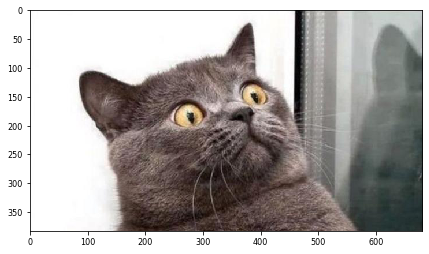

In [32]:
io.imshow(im)

In [33]:
im.shape

(383, 680, 3)

In [34]:
imre = cv.resize(im, (200, 100))

In [35]:
imre.shape

(100, 200, 3)

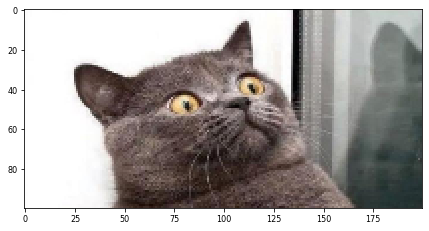

In [36]:
io.imshow(imre)

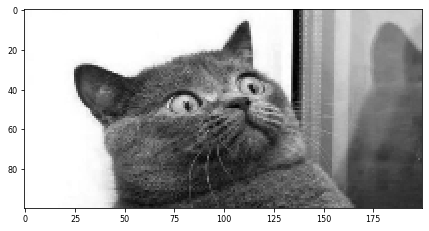

In [37]:
imgrey = convertToGray(imre)
io.imshow(imgrey)

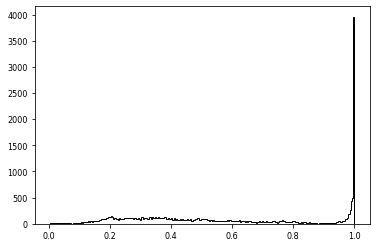

In [38]:
matplotlib.rcParams['font.size'] = 8

plt.hist(imggrey.ravel(), bins=256, histtype='step', color='black')
plt.show()

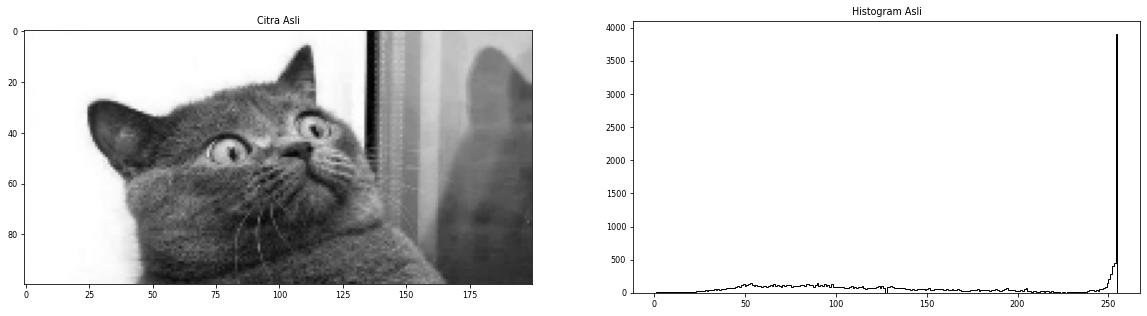

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.set_title('Citra Asli')
ax1.imshow(convertToRGB(imgrey))
ax2.set_title('Histogram Asli')
ax2.hist(img_as_ubyte(imgrey).ravel(), bins=256, histtype='step', color='black')

plt.show()

#### 2.	Lakukan proses penajaman (sharpening) pada gambar tersebut menggunakan program pilih ( unsharp / generate kernel negative manually ) dan pilih ( Robert / Sobel / Prewitt )

(100, 200) (3, 3)
93.0


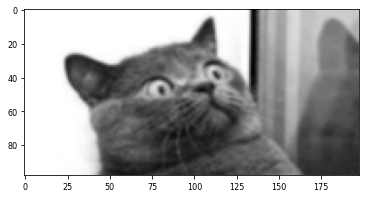

In [40]:
w_z = np.array([[1, 2, 1], 
                [2,4, 2],
                [1, 2, 1],],
dtype='float')
 
w_z = np.rot90(w_z, 2)
 
print (gray1.shape, w_z.shape)
z = signal.convolve2d(gray1, w_z, 'valid')
print(np.min(z))

plt.imshow(z,'gray')

In [41]:
z

array([[4047., 4055., 4061., ..., 3274., 3257., 3238.],
       [4049., 4059., 4063., ..., 3271., 3259., 3223.],
       [4054., 4065., 4068., ..., 3255., 3242., 3196.],
       ...,
       [4065., 4076., 4080., ...,  728.,  714.,  684.],
       [4063., 4075., 4080., ...,  744.,  727.,  702.],
       [4063., 4074., 4080., ...,  750.,  743.,  732.]])

(100, 200) (3, 3)
-226.0


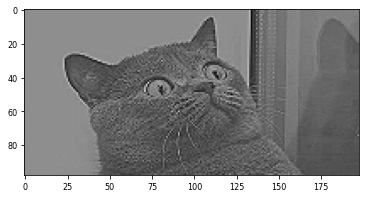

In [42]:
w_k = np.array([[0, -1, 0], 
                [-1,5, -1],
                [0, -1, 0],],
dtype='float')
 
w_k = np.rot90(w_k, 2)
 
print (gray1.shape, w_k.shape)
f = signal.convolve2d(gray1, w_k, 'valid')
print(np.min(f))

plt.imshow(f,'gray')

In [43]:
f

array([[248., 256., 250., ..., 211., 211., 206.],
       [247., 261., 249., ..., 208., 205., 199.],
       [252., 259., 247., ..., 212., 211., 195.],
       ...,
       [254., 256., 255., ...,  43.,  41.,  39.],
       [255., 256., 255., ...,  46.,  48.,  44.],
       [248., 257., 255., ...,  33.,  55.,  53.]])

In [44]:
kernel = np.array([[0, -1, 0],
                   [-1, 7,1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=imgrey, ddepth=-1, kernel=kernel)

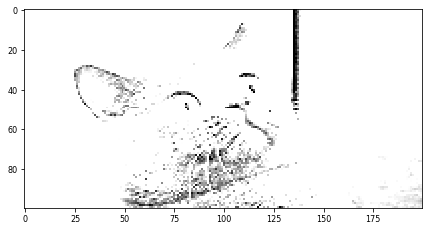

In [45]:
io.imshow(image_sharp)

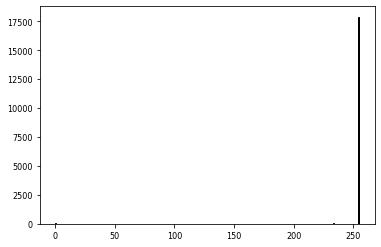

In [46]:
plt.hist(image_sharp.ravel(), bins=256, histtype='step', color='black')
plt.show()

In [47]:
manual = pd.DataFrame(image_sharp)
manual

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,255,255,255,255,255,255,255,255,255,255,...,244,235,234,222,226,222,231,236,227,207
96,255,255,255,255,255,255,255,255,255,255,...,234,218,227,230,235,234,227,218,204,189
97,255,255,255,255,255,255,255,255,255,255,...,247,243,251,239,246,240,235,233,219,210
98,255,255,255,255,255,255,255,255,255,255,...,253,228,232,255,255,255,224,250,241,227


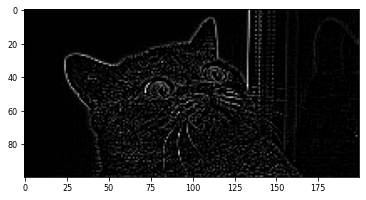

In [48]:
unsharp = cv.addWeighted(gray1,4, gaussian,-4, 1, gray1)
plt.imshow(unsharp,'gray')

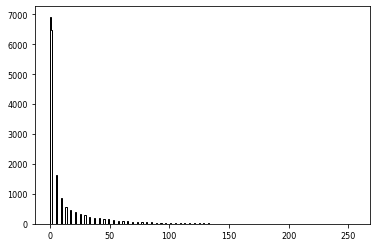

In [49]:
plt.hist(unsharp.ravel(), bins=256, histtype='step', color='black')
plt.show()

In [50]:
unsharpdata = pd.DataFrame(unsharp)
unsharpdata

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1,1,5,0,1,1,1,1,1,1,...,5,5,5,5,1,1,0,0,0,5
1,1,0,5,0,1,1,1,1,1,1,...,0,0,0,1,1,5,5,5,5,5
2,1,0,5,0,1,1,1,1,1,1,...,1,5,1,5,0,0,5,1,1,1
3,1,1,5,0,1,1,1,1,1,1,...,1,1,1,5,1,0,9,5,0,0
4,1,0,5,1,1,1,1,1,1,1,...,1,1,0,0,5,1,5,5,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,1,1,1,1,1,1,...,5,1,5,0,0,0,1,5,5,0
96,0,1,1,1,1,1,1,1,1,1,...,1,0,0,0,5,5,0,0,0,0
97,0,1,1,1,1,1,1,1,1,1,...,5,1,5,0,1,1,0,5,1,0
98,1,0,1,1,1,1,1,1,1,1,...,5,0,0,9,9,17,0,9,5,0


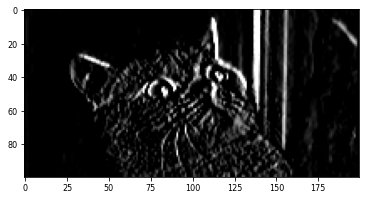

In [51]:
sobel = cv.Sobel(imgrey,-1, 1, 0, ksize=3)
plt.imshow(sobel,'gray')

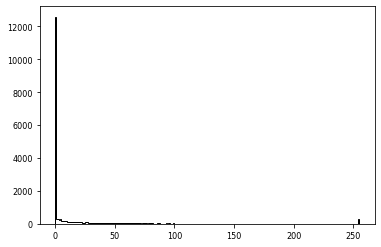

In [52]:
plt.hist(sobel.ravel(), bins=256, histtype='step', color='black')
plt.show()

In [53]:
sobeldata = pd.DataFrame(sobel)
sobeldata

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,4,2,4,8,0,0,0,0,0,...,2,2,6,6,4,0,0,0,2,0
1,0,5,3,3,8,0,0,0,0,0,...,3,2,7,5,1,4,0,0,0,0
2,0,7,3,1,8,0,0,0,0,0,...,1,1,8,2,0,8,5,0,0,0
3,0,8,3,0,6,0,0,0,0,0,...,0,0,4,0,0,5,6,0,0,0
4,0,8,6,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,5,4,0,0,0,0,0,0,0,...,0,0,0,1,1,0,4,0,0,0
96,0,7,4,0,0,0,0,0,0,0,...,0,0,0,1,3,0,0,0,0,0
97,0,7,5,0,0,0,0,0,0,0,...,0,0,5,6,6,0,0,0,0,0
98,0,5,6,0,0,0,0,0,0,0,...,0,0,9,12,4,0,0,2,0,0


#### 3.	Tuliskan kernel yang digunakan untuk masing-masing proses konvolusi! Berapa ukuran kernel yang digunakan pada masing-masing filter tersebut? dan bagian mana di program yang menunjukkan hal tersebut?

masing masing menggunakan kernel 3x3 dan dapat dilihat di kondingan berikut :
- unsharp: 
~~~
   gaussian = cv2.GaussianBlur(gray1,(3,3),50)
~~~
- sobel:
~~~
  sobel = cv2.Sobel(gray1,-1, 1, 1, ksize=3)
~~~

#### 4.	Pada program yang digunakan, apa yang dilakukan pada tepian gambar saat melakukan konvolusi? (zero padding / border replication / ignore the edge / lainnya) dan bagian mana di program yang menunjukkan hal tersebut?

- Negatif Manual =
  Border Replication
- Matriks Sobel = Border Replication

#### 5.	Pada program yang digunakan, apa yang dilakukan pada nilai hasil konvolusi yang berada di luar range intensitas gambar? (clipping / absolute / scalling / lainnya) dan bagian mana di program yang menunjukkan hal tersebut?

#### 6.	Copy nilai matriks 3x3 pojok kiri atas: gambar asli, gambar hasil unsharp / kernel manual, gambar hasil Robert / Sobel / Prewitt ke tabel di bawah ini. 

<TABLE  BORDER="1">
   <font size="5">
   <TR>
      <TH>
          <font size="5">
          Gambar Asli
          </font>
       </TH>
      <TH>
          <font size="5">
          Negatif Manual
          </font>
       </TH>
      <TH>
          <font size="5">
          Sobel
          </font>
       </TH>
   </TR>
   <TR>
      <TD>
          <font size="5">
          253 253 254<br>
          <br>
          253 252 254<br>
          <br>
          253 252 255<br>
          </font>
       </TD>
      <TD>
          <font size="5">
          253 254 255<br>
          <br>
          255 248 255<br>
          <br>
          255 247 255<br>
          </font>
      </TD>
      <TD>
          <font size="5">
          0 4 2<br>
          <br>
          0 5 3<br>
          <br>
          0 7 3<br>
          </font>
      </TD>
   </TR>
 </font>  
</TABLE>


####  7.	Tulis perhitungan manual hasil filter pada satu nilai intensitas di piksel (1,1) gambar asli.
#### Nilai intensitas gambar asli = 253